In [28]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
data_path = "./input/"
train = pd.read_csv(data_path+"train.csv")
test = pd.read_csv(data_path+"test.csv")

In [3]:
train.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [4]:
test.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


In [5]:
train['condition'] = train['condition'].fillna(3)

In [6]:
train['condition'].unique()

array([2., 1., 3., 0.])

<AxesSubplot:>

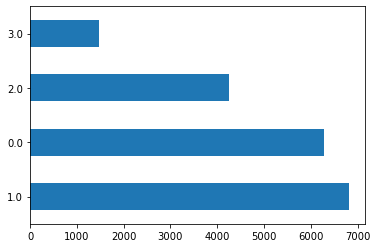

In [7]:
train['condition'].value_counts().plot(kind="barh")

<AxesSubplot:>

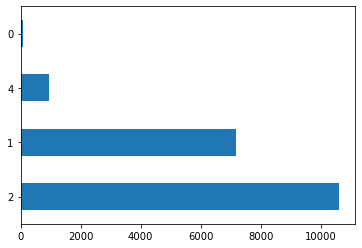

In [8]:
train['pet_category'].value_counts().plot(kind='barh')

<AxesSubplot:>

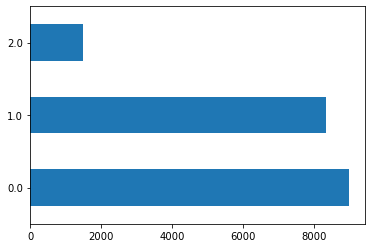

In [9]:
train['breed_category'].value_counts().plot(kind='barh')

<AxesSubplot:>

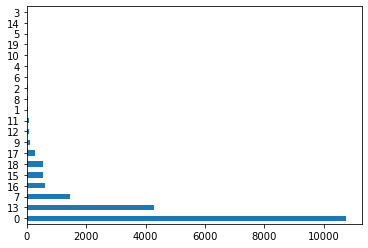

In [10]:
train['X1'].value_counts().plot(kind='barh')

<AxesSubplot:>

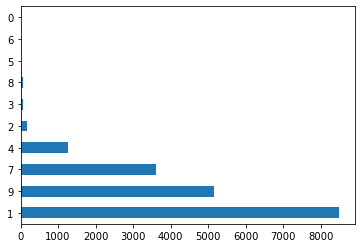

In [11]:
train['X2'].value_counts().plot(kind='barh')

In [12]:
train['issue_date'] = pd.to_datetime(train['issue_date'])

In [13]:
train['listing_date'] = pd.to_datetime(train['listing_date'])

In [14]:
train['listing_date']

0       2016-09-21 16:25:00
1       2018-12-27 17:47:00
2       2016-10-19 08:24:00
3       2019-01-25 18:30:00
4       2017-11-19 09:38:00
                ...        
18829   2018-03-09 15:35:00
18830   2017-07-09 08:37:00
18831   2018-08-22 14:27:00
18832   2018-02-08 14:05:00
18833   2018-10-26 14:18:00
Name: listing_date, Length: 18834, dtype: datetime64[ns]

In [15]:
duration = (train['listing_date'] - train['issue_date']).dt.days

In [16]:
train['duration'] = duration

In [17]:
train = train.drop(['issue_date','listing_date','pet_id'],axis=1)
train.head()

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,duration
0,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,73
1,1.0,White,0.72,14.19,13,9,0.0,2,1862
2,3.0,Brown,0.15,40.90,15,4,2.0,4,752
3,1.0,White,0.62,17.82,0,1,0.0,2,755
4,2.0,Black,0.50,11.06,18,4,0.0,1,52


In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
labelencoder = LabelEncoder()
train['color_type'] = labelencoder.fit_transform(train['color_type'])

In [22]:
train.head()

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,duration
0,2.0,18,0.80,7.78,13,9,0.0,1,73
1,1.0,53,0.72,14.19,13,9,0.0,2,1862
2,3.0,15,0.15,40.90,15,4,2.0,4,752
3,1.0,53,0.62,17.82,0,1,0.0,2,755
4,2.0,2,0.50,11.06,18,4,0.0,1,52


In [26]:
train['color_type'].nunique()

56

In [36]:
train['height(cm)'] = train['height(cm)']/100

In [37]:
train.head()

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,duration
0,2.0,18,0.80,0.0778,13,9,0.0,1,73
1,1.0,53,0.72,0.1419,13,9,0.0,2,1862
2,3.0,15,0.15,0.4090,15,4,2.0,4,752
3,1.0,53,0.62,0.1782,0,1,0.0,2,755
4,2.0,2,0.50,0.1106,18,4,0.0,1,52


In [38]:
info = pd.DataFrame()
info['length(m)'] = [np.percentile(train['length(m)'],25*i) for i in range(1,4)]
info['height(cm)'] = [np.percentile(train['height(cm)'],25*i) for i in range(1,4)]
info['duration'] = [np.percentile(train['duration'],25*i) for i in range(1,4)]

In [39]:
info

,length(m),height(cm),duration
0,0.25,0.161725,119.0
1,0.50,0.273400,392.0
2,0.76,0.388900,1117.0


In [40]:
info.loc[3] = [2.5*info.loc[0,column] - 1.5*info.loc[2,column] for column in info.columns]
info.loc[4] = [2.5*info.loc[2,column] - 1.5*info.loc[0,column] for column in info.columns]
info

,length(m),height(cm),duration
0,0.250,0.161725,119.0
1,0.500,0.273400,392.0
2,0.760,0.388900,1117.0
3,-0.515,-0.179038,-1378.0
4,1.525,0.729663,2614.0


In [41]:
def range_part(column,value):
    if value > info.loc[4,column]:
        return 5
    elif value > info.loc[2,column]:
        return 4
    elif value > info.loc[1,column]:
        return 3
    elif value > info.loc[0,column]:
        return 2
    elif value > info.loc[3,column]:
        return 1
    else:
        return 0

In [43]:
from tqdm import tqdm
tqdm.pandas()
train['length_range'] = train['length(m)'].progress_apply(lambda x:range_part('length(m)',x))
train['height_range'] = train['height(cm)'].progress_apply(lambda x:range_part('height(cm)',x))
train['duration_range'] = train['duration'].progress_apply(lambda x:range_part('duration',x))
train

100%|█████████████████████████████████████████████████████████████████████████| 18834/18834 [00:00<00:00, 36989.62it/s]


,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,duration,length_range,height_range,duration_range
0,2.0,18,0.80,0.0778,13,9,0.0,1,73,4,1,1
1,1.0,53,0.72,0.1419,13,9,0.0,2,1862,3,1,4
2,3.0,15,0.15,0.4090,15,4,2.0,4,752,1,4,3
3,1.0,53,0.62,0.1782,0,1,0.0,2,755,3,2,3
4,2.0,2,0.50,0.1106,18,4,0.0,1,52,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18829,2.0,52,0.44,0.2736,0,1,0.0,2,407,2,3,3
18830,3.0,15,0.73,0.1425,15,4,2.0,4,386,3,1,2
18831,0.0,22,0.99,0.2813,13,9,1.0,1,2954,4,3,5
18832,0.0,48,0.55,0.4482,13,9,1.0,2,272,3,4,2
